In [88]:
# Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.
# Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'
# EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
# JobInvolvement 
# 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
# JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
# PerformanceRating 
# 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'
# RelationshipSatisfaction 
# 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
# WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [90]:
df = pd.read_csv('dataset.csv')
#df.columns
#df.head()

In [91]:
cols = list(df.columns)

In [92]:
#Dropping columns. 
#EmployeCount is always 1, Employee Number is just the primary key (ID), All people were over 18, All people worked 80 hours a week
cols_drop = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df.drop(cols_drop, axis = 1, inplace=True) 

#Encoding Yes/No categorical variables with 2 categories. More than 2 categories will be one-hot-encoded later on.
df['Gender'].replace(('Male', 'Female'), (1, 0), inplace=True)
df['OverTime'].replace(('Yes', 'No'), (1, 0), inplace=True)
df['Attrition'].replace(('Yes', 'No'), (1, 0), inplace=True)

In [93]:
#Reordering the columns columns.
#I want my Y variable to be in the beginning or end, that way, it will be easier to index later on
cols_y = ['Attrition']
cols_onehot= ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
cols_ok = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
             'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
new_cols = cols_y + cols_onehot + cols_ok
df = df.reindex(columns=new_cols)
df.head()

,Attrition,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,Age,DailyRate,DistanceFromHome,Education,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Travel_Rarely,Sales,Life Sciences,Sales Executive,Single,41,1102,1,2,...,3,1,0,8,0,1,6,4,0,5
1,0,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,49,279,8,1,...,4,4,1,10,3,3,10,7,1,7
2,1,Travel_Rarely,Research & Development,Other,Laboratory Technician,Single,37,1373,2,2,...,3,2,0,7,3,3,0,0,0,0
3,0,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,33,1392,3,4,...,3,3,0,8,3,3,8,7,3,0
4,0,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Married,27,591,2,1,...,3,4,1,6,3,3,2,2,2,2


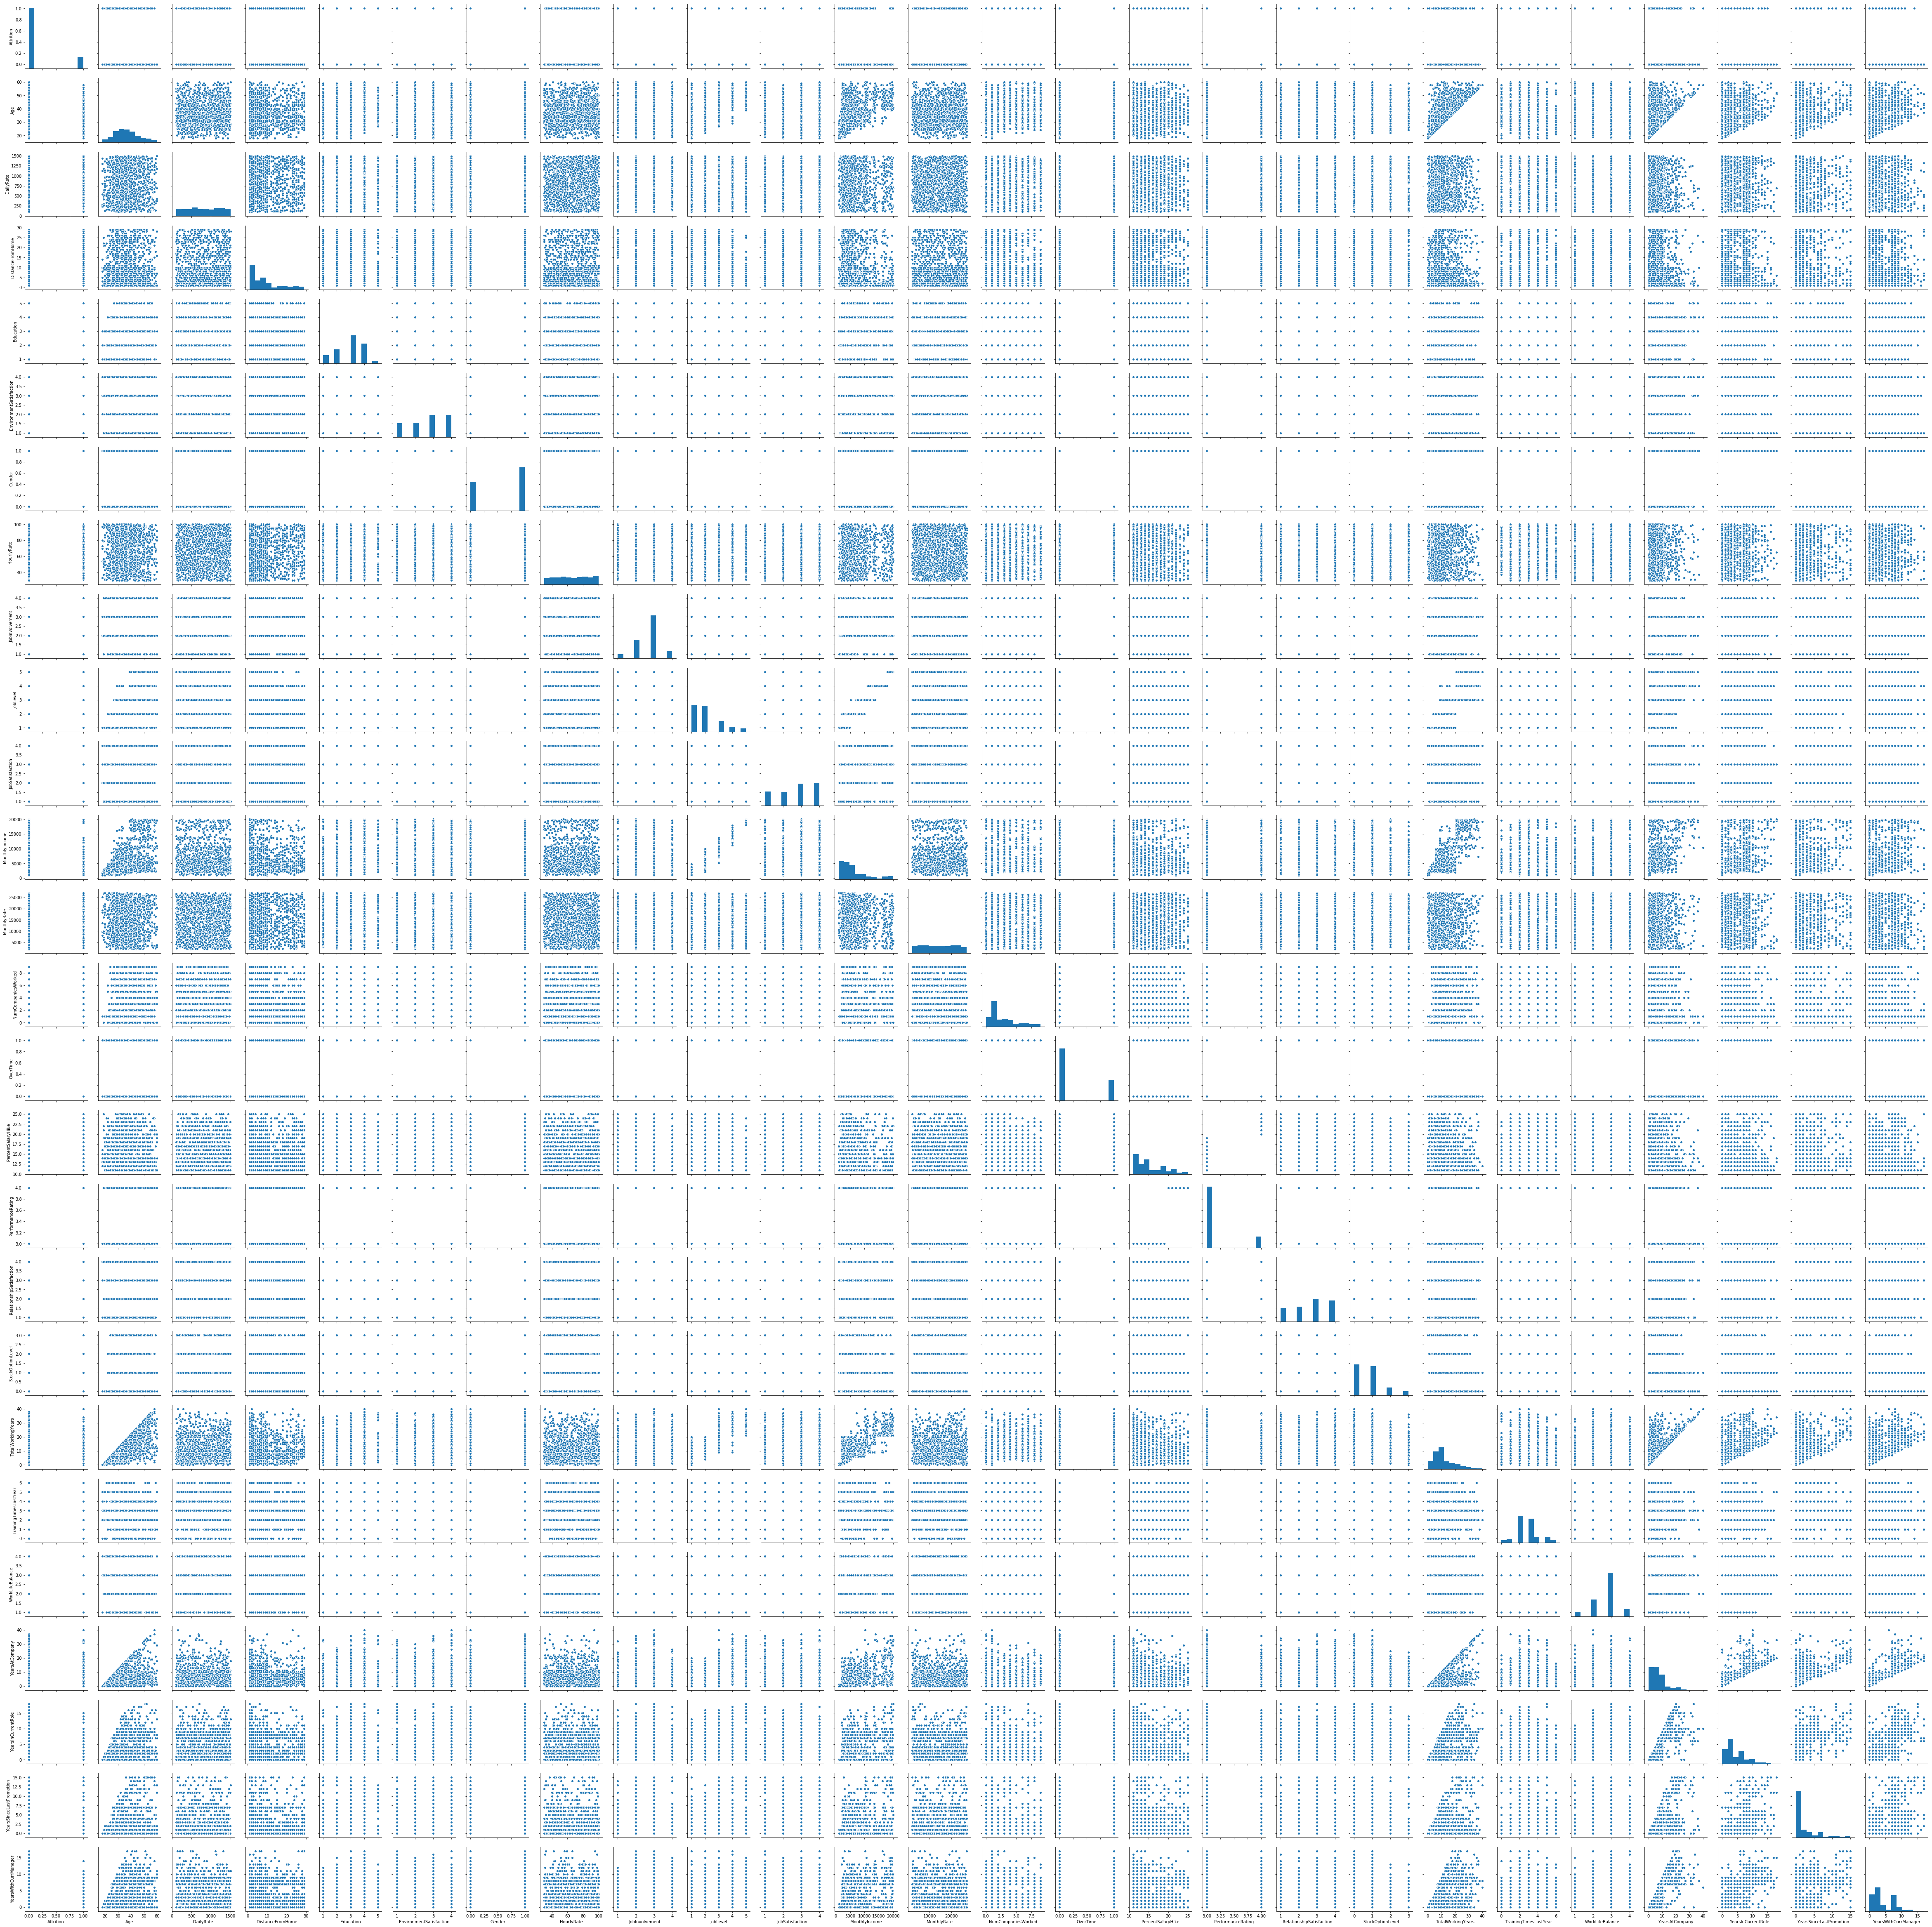

In [94]:
sns.pairplot(df)

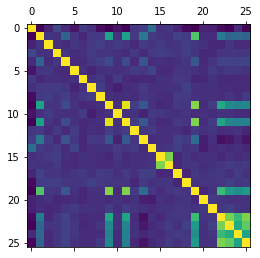

In [95]:
plt.matshow(df.corr())

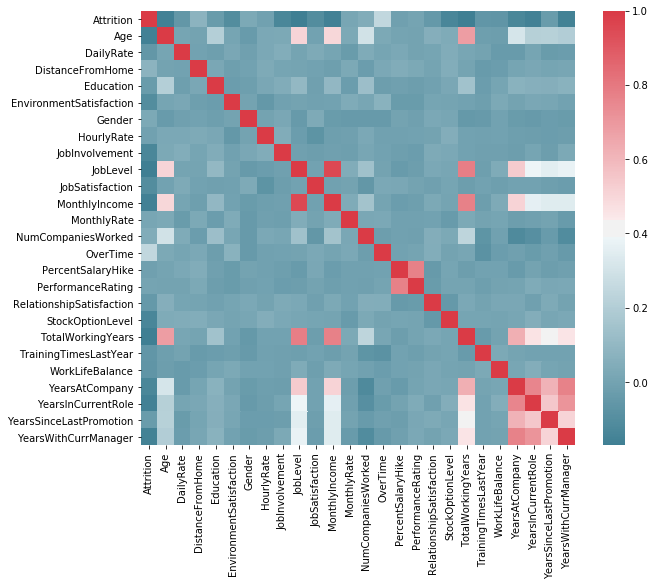

In [96]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

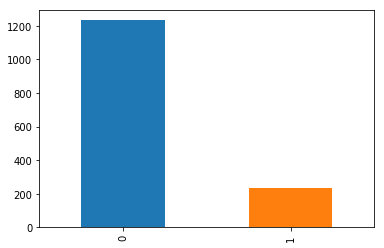

In [97]:
#Let's See if there's a class imbalance on our Y variable
df['Attrition'].value_counts().plot(kind='bar')

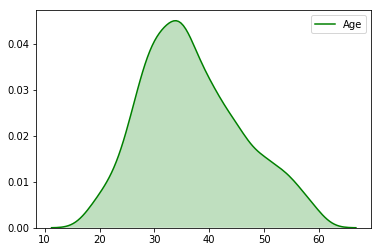

In [98]:
#Distribution of Age, it looks like we have a guassian distribution
sns.kdeplot(df['Age'], shade=True, color = 'g')

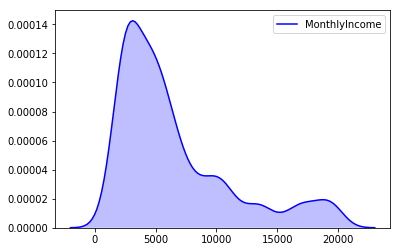

In [99]:
#Distribution of Income, we have the fat right tail.
sns.kdeplot(df['MonthlyIncome'], shade=True, color = 'b')

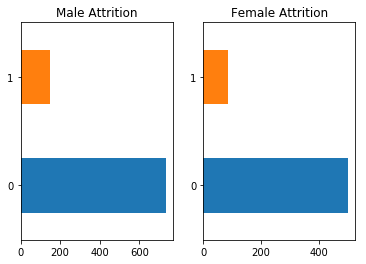

In [100]:
#Does gender have a factor in attrition? It doesn't look like it.
fig, axs = plt.subplots(1,2)
df[df.Gender==1].Attrition.value_counts().plot(kind='barh', ax=axs[0], title='Male Attrition')
df[df.Gender==0].Attrition.value_counts().plot(kind='barh', ax=axs[1], title='Female Attrition')

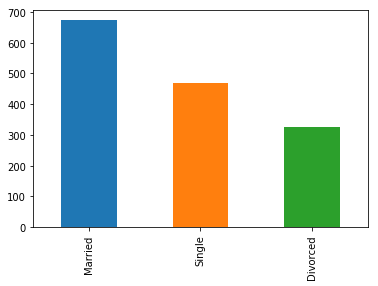

In [101]:
#MaritalStatus Distribution
df['MaritalStatus'].value_counts().plot(kind='bar')

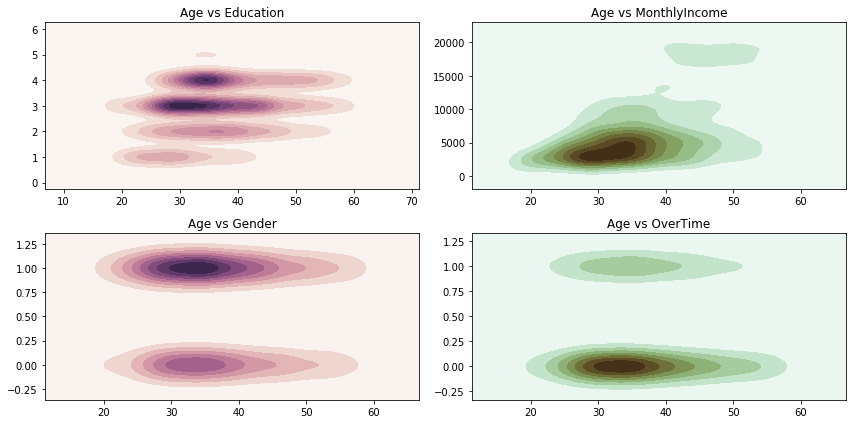

In [102]:
#EDA Plots
f, axes = plt.subplots(2, 2, figsize=(12, 6), 
                       sharex=False, sharey=False)
s = np.linspace(0, 3, 10)

cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)
a = df['Age'].values
b = df['Education'].values
sns.kdeplot(a, b, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'Age vs Education')

cmap = sns.cubehelix_palette(start=1, light=1, as_cmap=True)
a = df['Age'].values
b = df['MonthlyIncome'].values
sns.kdeplot(a, b, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'Age vs MonthlyIncome')

cmap = sns.cubehelix_palette(start=3, light=1, as_cmap=True)
a = df['Age'].values
b = df['Gender'].values
sns.kdeplot(a, b, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set( title = 'Age vs Gender')

cmap = sns.cubehelix_palette(start=4, light=1, as_cmap=True)
a = df['Age'].values
b = df['OverTime'].values
sns.kdeplot(a, b, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = 'Age vs OverTime')


f.tight_layout()

In [103]:
#One-Hot-Encoding the categorical variables with more than 2 categories, dropping a variable to prevent multi-collinearity on linear models
df = pd.get_dummies(df, columns=cols_onehot, drop_first=True)

In [104]:
df.head()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,1,41,1102,1,2,2,0,94,3,2,...,0,0,0,0,0,0,1,0,0,1
1,0,49,279,8,1,3,1,61,2,2,...,0,0,0,0,0,1,0,0,1,0
2,1,37,1373,2,2,4,1,92,2,1,...,0,1,0,0,0,0,0,0,0,1
3,0,33,1392,3,4,4,0,56,3,1,...,0,0,0,0,0,1,0,0,1,0
4,0,27,591,2,1,1,1,40,3,1,...,0,1,0,0,0,0,0,0,1,0


In [105]:
#Splitting our X and Y variables
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [106]:
#Importing confusion matrix and accuracy score packes, setting test_size to 30 to prevent overfitting
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [107]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm, acc)

[[367   4]
 [ 50  20]] 0.8775510204081632


In [108]:
#K-Nearest-Neighbors
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm, acc)

[[355  16]
 [ 65   5]] 0.8163265306122449


In [109]:
#Linear Support Vector Classifier
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm, acc)

[[361  10]
 [ 55  15]] 0.8526077097505669


In [110]:
#Support Vector Classifier with rbf kernel
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm, acc)

[[371   0]
 [ 70   0]] 0.8412698412698413


In [111]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm, acc)

[[285  86]
 [ 24  46]] 0.7505668934240363


In [112]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm, acc)

[[333  38]
 [ 48  22]] 0.8049886621315193


In [113]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm, acc)

[[369   2]
 [ 59  11]] 0.8616780045351474


In [114]:
#Multi-layer Perceptron
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(500,500))
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm, acc)

[[369   2]
 [ 59  11]] 0.8616780045351474


In [115]:
#Time for the real deal, Microsoft's LightGBM 
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from lightgbm import Dataset

In [116]:
lgb_params = {
    'num_leaves': 7,
    'objective': 'binary',
    'metric': 'binary_logloss',
    'verbose': 0
}
boost_rounds_form = 80
model_form = LGBMClassifier(**lgb_params, num_boost_round=boost_rounds_form)

In [117]:
lgb_train = Dataset(data = X, label = y)
cv = lgb.cv(lgb_params, 
              lgb_train, 
              nfold = 10,
              num_boost_round=100, 
              early_stopping_rounds=15,
              stratified=False, 
              verbose_eval=50)

[50]	cv_agg's binary_logloss: 0.336026 + 0.0499063


In [118]:
params = {'bagging_fraction': 0.6199939947496634, 'colsample_bytree': 0.1, 'feature_fraction': 0.5, 'max_depth': 3, 'min_child_weight': 16.242034792113287, 'min_split_gain': 0.1, 'n_estimators': 140, 'subsample': 0.9351274825356811}

In [119]:
boost_rounds_form = 1000
lgb_train_form = lgb.Dataset(X_train, y_train)
gbm_form = lgb.train(
                params,
                lgb_train_form,
                valid_sets=lgb_train_form,
                num_boost_round=boost_rounds_form)

C:\Users\Agi\Anaconda3\lib\site-packages\lightgbm\engine.py:102: UserWarning:

Found `n_estimators` in params. Will use it instead of argument



In [120]:
preds = gbm_form.predict(data=X_test, raw_score=True)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

for i in range(0,len(preds)):
    if preds[i]>=.5:       # setting threshold to .5
        preds[i]=1
    else:  
        preds[i]=0
preds

cfm =confusion_matrix(y_test, preds)
cfm
list1 = ["Actual No", "Actual Yes"]
list2 = ["Predicted No", "Predicted Yes"]

In [129]:
pd.DataFrame(cfm, list1, list2)

,Predicted No,Predicted Yes
Actual No,366,5
Actual Yes,51,19


In [122]:
#Final Accuracy Result
accuracy_score(y_test,preds)

0.873015873015873

In [123]:
#Printing our feature importances
lgb_fimportance = [e for e in zip((list(gbm_form.feature_importance("split"))), list(df.iloc[:, :]))]
lgb_fimportance = sorted(lgb_fimportance, key=lambda x: -x[0])
lgb_fimportance

[(53, 'JobSatisfaction'),
 (37, 'MonthlyIncome'),
 (36, 'Age'),
 (28, 'Attrition'),
 (27, 'Education'),
 (22, 'MonthlyRate'),
 (21, 'OverTime'),
 (21, 'WorkLifeBalance'),
 (20, 'NumCompaniesWorked'),
 (20, 'YearsSinceLastPromotion'),
 (19, 'JobLevel'),
 (19, 'RelationshipSatisfaction'),
 (18, 'DailyRate'),
 (17, 'Gender'),
 (14, 'TrainingTimesLastYear'),
 (12, 'YearsInCurrentRole'),
 (11, 'HourlyRate'),
 (11, 'PerformanceRating'),
 (11, 'TotalWorkingYears'),
 (11, 'YearsWithCurrManager'),
 (9, 'JobInvolvement'),
 (8, 'StockOptionLevel'),
 (8, 'JobRole_Research Director'),
 (7, 'EducationField_Other'),
 (7, 'MaritalStatus_Married'),
 (5, 'EducationField_Life Sciences'),
 (5, 'EducationField_Marketing'),
 (5, 'JobRole_Sales Executive'),
 (4, 'Department_Research & Development'),
 (4, 'JobRole_Human Resources'),
 (4, 'JobRole_Research Scientist'),
 (2, 'BusinessTravel_Travel_Rarely'),
 (1, 'DistanceFromHome'),
 (1, 'YearsAtCompany'),
 (1, 'JobRole_Sales Representative'),
 (0, 'Environment

In [124]:
#Hyperparameter tuning using BayesSearch for higher model accuracy
from skopt import BayesSearchCV
X_full = X
y_form_full = y
params = {
    'max_depth': (3, 15),
    'min_child_weight': (1e-3, 1e+3),
    'n_estimators': (1, 300),
    'colsample_bytree': (1e-1, 1e+0),
    'subsample': (0.4, 1),
    'bagging_fraction': (0.5, 1),
    'feature_fraction': (0.5, 1),
    'min_split_gain': (0.1, 10),
}
opt_form = BayesSearchCV(
    lgb.LGBMRegressor(boosting_type='gbdt', objective='binary', metric='binary_loglos', categorical_feature=0),
    params,
    n_iter=100,
    n_jobs=4
)
opt_form.fit(X_full, y_form_full)

print("val. score: %s" % opt_form.best_score_)
print(opt_form.best_params_)

val. score: 0.27188407793415253
{'bagging_fraction': 0.6506268657255213, 'colsample_bytree': 0.27836217615984127, 'feature_fraction': 0.5, 'max_depth': 7, 'min_child_weight': 17.413322006993166, 'min_split_gain': 0.1, 'n_estimators': 167, 'subsample': 0.8955984368045544}


C:\Users\Agi\Anaconda3\lib\site-packages\lightgbm\basic.py:661: UserWarning:

categorical_feature keyword has been found in `params` and will be ignored. Please use categorical_feature argument of the Dataset constructor to pass this parameter.



In [125]:
#Accuracy isn't everything, there are a lot of instances where we predict that the person is going to stay in the company and they actually left. This is bad.
#Time to try resampling, in this method, I will be using SMOTE.
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE

In [141]:
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1500,
    'warm_start': True, 
    'max_features': 18,
    'max_depth': 15,
    'min_samples_leaf': 6,
    'max_features' : 10,
    'random_state' : 42,
    'verbose': 0
}
resampler=SMOTE(random_state=42)
sampled_X_train, sampled_y_train  = resampler.fit_sample(X_train,y_train)

In [146]:
#Random Forest with resampling
rf = RandomForestClassifier(n_estimators = 4000, criterion = 'entropy', random_state = 0)
rf.fit(sampled_X_train, sampled_y_train)
y_pred = rf.predict(X_test)
cfm = confusion_matrix(y_test.tolist(), y_pred.tolist())
acc = accuracy_score(y_test, y_pred)
print(cfm, acc)

[[365   6]
 [ 51  19]] 0.8707482993197279
